In [30]:
from imblearn.over_sampling import SMOTE, ADASYN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.tabular.all import df_shrink
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.validation import check_is_fitted
from sklearn.pipeline import make_pipeline
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Capstone/TON_IOT_pre.unknown")

In [32]:
print(df.shape)
df.head()

(1210789, 20)


,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,IPV4_SRC_ADDR_0,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_DST_ADDR_0,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3
0,63318,443,6,91.00,181,165,2,1,24,327,0,Benign,192,168,1,195,52,139,250,253
1,57442,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
2,57452,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,239,255,255,250
3,51989,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
4,53927,1900,17,153.12,459,0,3,0,0,614,0,Benign,192,168,1,6,239,255,255,250


In [33]:
df.drop(columns='Label', inplace=True)

In [34]:
df1 = df[df['Attack']!="Benign"]

In [36]:
print(df1.shape)
df1.head()

(998115, 19)


,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Attack,IPV4_SRC_ADDR_0,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_DST_ADDR_0,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3
8,60641,53,17,5.0,108,108,2,2,0,4,dos,192,168,1,31,192,168,1,1
9,60641,53,17,5.0,108,108,2,2,0,4,injection,192,168,1,31,192,168,1,1
10,60641,53,17,5.0,108,108,2,2,0,4,ddos,192,168,1,31,192,168,1,1
11,38524,53,17,5.0,100,100,2,2,0,5,injection,192,168,1,31,192,168,1,1
12,38524,53,17,5.0,100,100,2,2,0,5,ddos,192,168,1,31,192,168,1,1


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998115 entries, 8 to 1210788
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   L4_SRC_PORT                 998115 non-null  int64  
 1   L4_DST_PORT                 998115 non-null  int64  
 2   PROTOCOL                    998115 non-null  int64  
 3   L7_PROTO                    998115 non-null  float64
 4   IN_BYTES                    998115 non-null  int64  
 5   OUT_BYTES                   998115 non-null  int64  
 6   IN_PKTS                     998115 non-null  int64  
 7   OUT_PKTS                    998115 non-null  int64  
 8   TCP_FLAGS                   998115 non-null  int64  
 9   FLOW_DURATION_MILLISECONDS  998115 non-null  int64  
 10  Attack                      998115 non-null  object 
 11  IPV4_SRC_ADDR_0             998115 non-null  int64  
 12  IPV4_SRC_ADDR_1             998115 non-null  int64  
 13  IPV4_SRC_ADDR

In [38]:
df1 = df_shrink(df1, obj2cat=False, int2uint=False)

In [39]:
df1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998115 entries, 8 to 1210788
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   L4_SRC_PORT                 998115 non-null  int32  
 1   L4_DST_PORT                 998115 non-null  int32  
 2   PROTOCOL                    998115 non-null  int8   
 3   L7_PROTO                    998115 non-null  float32
 4   IN_BYTES                    998115 non-null  int32  
 5   OUT_BYTES                   998115 non-null  int32  
 6   IN_PKTS                     998115 non-null  int16  
 7   OUT_PKTS                    998115 non-null  int16  
 8   TCP_FLAGS                   998115 non-null  int8   
 9   FLOW_DURATION_MILLISECONDS  998115 non-null  int32  
 10  Attack                      998115 non-null  object 
 11  IPV4_SRC_ADDR_0             998115 non-null  int16  
 12  IPV4_SRC_ADDR_1             998115 non-null  int16  
 13  IPV4_SRC_ADDR

In [40]:
X = df1.drop(columns='Attack')
y = df1['Attack']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [42]:
pipe1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [43]:
pipe1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [44]:
pipe1.score(X_test, y_test)

0.5881160105639024

In [45]:
pred = pipe1.predict(X_test)

In [46]:
print(classification_report(y_test, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    backdoor       1.00      0.99      0.99      4319
        ddos       0.64      0.69      0.67     56716
         dos       0.40      0.46      0.43      4193
   injection       0.63      0.82      0.72    116073
        mitm       0.86      0.28      0.43       339
    password       0.31      0.14      0.20     37758
  ransomware       0.70      0.24      0.36        29
    scanning       0.00      0.00      0.00      5167
         xss       0.00      0.00      0.00     24935

    accuracy                           0.59    249529
   macro avg       0.51      0.40      0.42    249529
weighted avg       0.51      0.59      0.54    249529



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


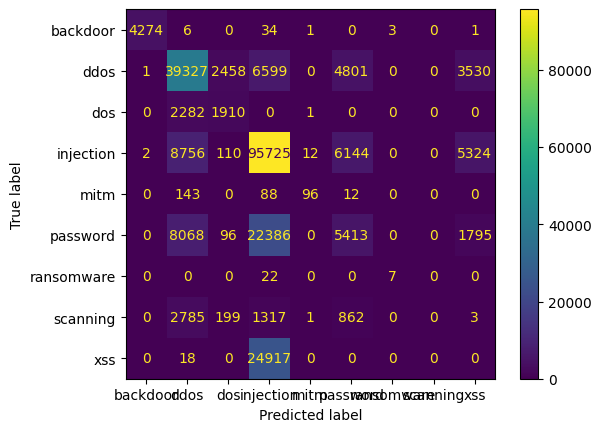

In [47]:
ConfusionMatrixDisplay.from_estimator(pipe1,X_test,y_test);

In [48]:
pipe2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=0)
)

In [49]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]

In [50]:
params = {
    'randomforestclassifier__n_estimators' : n_estimators ,
    'randomforestclassifier__max_features' : max_features ,
    'randomforestclassifier__max_depth' : max_depth ,
    'randomforestclassifier__min_samples_split' : min_samples_split
}

In [51]:
rf_random = RandomizedSearchCV(
    pipe2,
    params,
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [52]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=0))]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [5,
                                                                              13,
                                                                              21,
                                                                              30],
                                        'randomforestclassifier__max_features': ['auto',
                                                                                 'sqrt'],
                                        'randomforestclassifier__min_samples_split': [5,
                                                                                      10,
                                                                                      15,
                                                                                      100],
                                        'randomforestclassifier__n_estimators': [100,
                                                                                 320,
                                                                                 540,
                                                                                 760,
                                                                                 980,
                                                                                 1200]},
                   verbose=1)

In [1]:
rf_model

NameError: ignored